In [2]:
from vit_pipeline.utils import make_container_dict
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import os
import pickle

load_dotenv()

allen_cache_path = os.environ.get('HGMS_ALLEN_CACHE_PATH')
boc = BrainObservatoryCache(manifest_file=str(Path(allen_cache_path) / Path('brain_observatory_manifest.json')))

experiment_containers = make_container_dict(boc)

session_A=experiment_containers[643061996]['three_session_A']
data_set_events= boc.get_ophys_experiment_events(session_A)

dat = boc.get_ophys_experiment_data(session_A)
stim_table = dat.get_stimulus_table('natural_movie_one')

transformer_embedding_path = Path("/home/maria/Documents/HuggingMouseData/TransformerEmbeddings/google_vit-base-patch16-224_embeddings.pkl") 
        # Load the transformer embeddings
with open(transformer_embedding_path, 'rb') as file:
    transfr = pickle.load(file)
embedding = transfr['natural_movie_one']  # Shape: (total_time_points, embedding_dim)
embedding_dim = embedding.shape[1]

first_trial=stim_table[0:900]

all_cells=data_set_events[:,first_trial['start']]

v=all_cells.T
X=embedding

filtered=v.T@X

(array([ 10000.,  34440.,  64854.,  91048., 100590., 101048.,  88958.,
         59684.,  31258.,   7944.]),
 array([-0.97342406, -0.77608166, -0.57873925, -0.38139685, -0.18405444,
         0.01328797,  0.21063037,  0.40797278,  0.60531519,  0.80265759,
         1.        ]),
 <BarContainer object of 10 artists>)

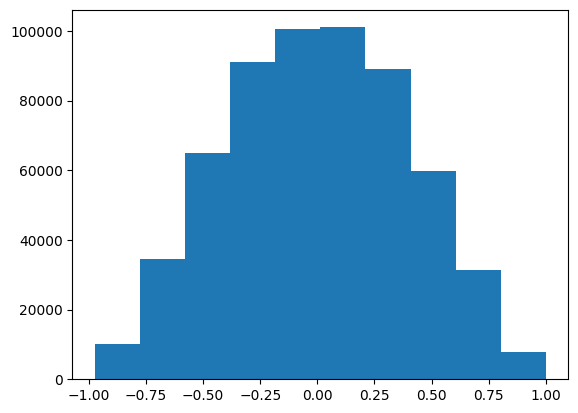

In [4]:
from scipy.stats import spearmanr, pearsonr
plt.hist(spearmanr(filtered)[0].flatten())

/home/maria/MousePipeline/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/maria/MousePipeline/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


(array([  996.,  4990.,  6024.,  7700., 10530., 12584., 11498.,  8272.,
         3228.,   742.]),
 array([0.03710887, 0.13339798, 0.22968709, 0.32597621, 0.42226532,
        0.51855443, 0.61484355, 0.71113266, 0.80742177, 0.90371089,
        1.        ]),
 <BarContainer object of 10 artists>)

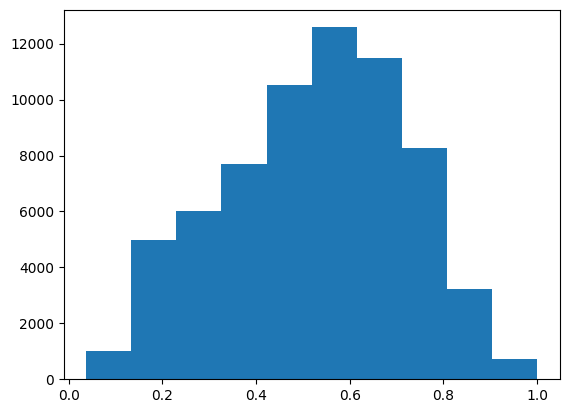

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming filtered is MxN where M > 2
pearson_corr_matrix = np.corrcoef(filtered)

plt.hist(pearson_corr_matrix.flatten())